In [7]:
import numpy as np_ # Original numpy 
import scipy as sp

import random

# Plot
from IPython.display import display, Latex
import matplotlib.pyplot as plt

# PennyLane
import pennylane as qml
from pennylane import numpy as np

# qnode device
dev = qml.device('default.mixed', wires = 2)

# Building hamiltonian
coeffs = [-0.5]
obs = [qml.PauliZ(0) @ qml.PauliZ(1)]

hamiltonian_2 = qml.Hamiltonian(coeffs, obs)  # Define Hamiltonian

$$
\sigma_z \otimes \sigma_z = 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 \\
0 & 0 & -1 & 0 \\
0 & 0 & 0 & 1 \\
\end{pmatrix}
$$

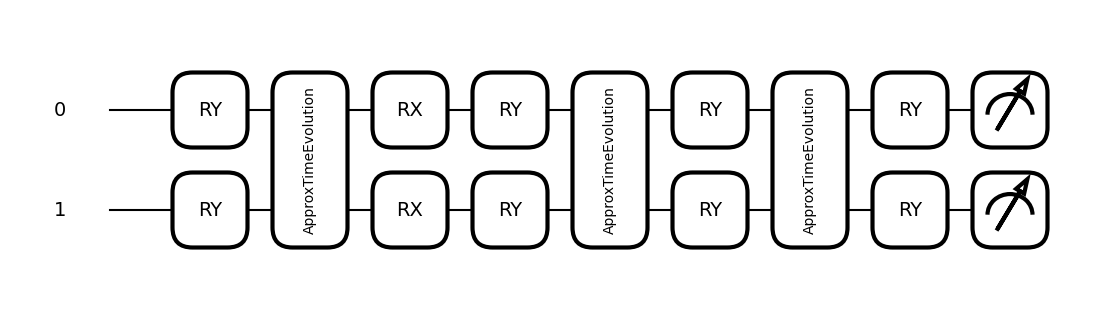

In [8]:
@qml.qnode(dev)
def circuit(phi):    
    # Stage_1
    qml.RY(np.pi/2, wires=0)
    qml.RY(np.pi/2, wires=1)
    
    # Stage_2: Entnagler
    qml.ApproxTimeEvolution(hamiltonian_2, np.pi/8, 1)
    
    qml.RX(np.pi/2, wires=0)
    qml.RX(np.pi/2, wires=1)
    
    qml.RY(-np.pi/2, wires=0)
    qml.RY(-np.pi/2, wires=1)
    
    qml.ApproxTimeEvolution(hamiltonian_2, np.pi/4, 1)
    
    qml.RY(np.pi/2, wires=0)
    qml.RY(np.pi/2, wires=1)
    
    # Stage_3: Phase accumulator
    qml.ApproxTimeEvolution(hamiltonian_2, phi, 1)  # Hamiltonian => Same as entangler?
    
    qml.RY(np.pi/2, wires=0)
    qml.RY(np.pi/2, wires=1)
    
    return qml.density_matrix(wires=[0, 1])
    # return qml.probs(wires=[0, 1])
    

fig, ax = qml.draw_mpl(circuit)(1)

In [9]:
# Sweep for 1e-4 ~ 3pi + 1e-4
PHI = np.arange(1e-4, 3*np.pi + 1e-4, 1e-1)
Data = np.zeros((len(PHI)))

DUMMY = np.zeros(len(PHI))

for i in range(len(PHI)):
    Data[i] = qml.qinfo.classical_fisher(circuit)(PHI[i])

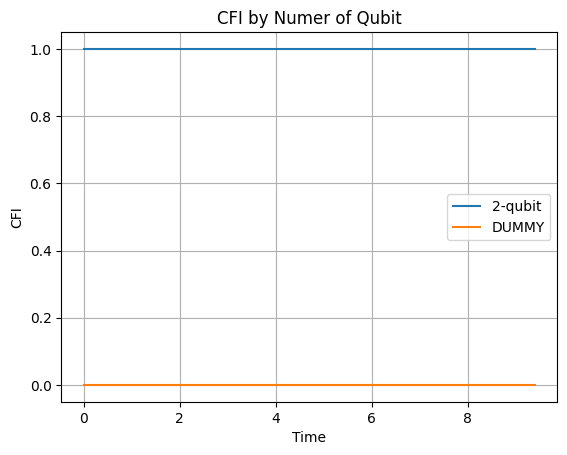

In [10]:
plt.title(f'CFI by Numer of Qubit')

plt.plot(PHI, Data[:], label = '2-qubit')
plt.plot(PHI, DUMMY, label = 'DUMMY')

plt.xlabel('Time')
plt.ylabel('CFI')
plt.grid()
plt.legend()